# Aalto Pro/Diploma in Artificial Intelligence: Project work



## Applying data science and machine learning in development of a tool for sustainable waste management onboard cruise ship

### Abstract


### Background

In this work, a data product will be produced by using data science tools and machine learning (ML) algorithms that would help a cruise ship operator to plan ahead the future waste management operations by a most sustainable and feasible way.
The project work is done by constructing the ML-product by using real shipboard operational data and external web sources. The purpose is to create ML-system that would give a decent picture and prediction of the best option for the operations.

#### Cruise ship waste

A cruise ship is a passenger ship used for pleasure voyages when the voyage itself, the ship's amenities, and sometimes the different destinations along the way (i.e., ports of call), form part of the passengers' experience [1]. Modern cruise ships can be considered as a combination of hotel, shopping center, amusement park, casino, spa and a center of all kind of restaurants with big galleys for preparation of all kind of meals. All these onboard activities produces high volumes of wastes that is around 2 to 3 times the amount produced by municipal centers per capita [2]. Especially, as all the meals (around 8 per each day) are prepared onboard the ship in the central galleys. Thereby, organic and nutrient loading of the waste, if discharged to the sea, is very high.

The waste management system of a modern cruise ship is confined to ship machinery spaces. There are basically three type of solid waste produced onboard: Dry waste (DW), food waste (FW) and biosludge waste(BW). The DW is mainly solid packing materials from the provisions and unsorted waste from the cabins and restaurants. The FW is produced mainly from the food preparation from the gallies but also as a food rejects from bars, restaurants and crew messes of the ship. The BW is a biological surplus sludge from the ship wastewater treatment plant.

The management and the discharge of the waste materials is strictly regulated by both international and national legislations and guidelines. International Maritime Organisation (IMO) [3] The discharge of garbage is strictly prohibited in all sea areas. The discharge of FW and BW is also strictly regulated and also prohibited in many special sea areas. In addition to this the storage silos for these waste materials is very limited and is sufficient only for couple of days.

#### Motivation for the work

Evac Oy supplies integrated cleantech solutions, including e.g. waste management systems, to all types of ships. The cruise ships are our biggest market segment and for past few years Evac has had more than 80 % of market share in waste systems. The sustainability is the key value for all major cruise ship owners. Not only because of regulations and guidelines, but because of acceptability of the cruise business as a whole. Basically, the cruise ships are operated by zero-discharge principle.

The cruise ships are operated on a strictly defined itinerary and and in the given schedule. The shipboard waste management is not the main operation of the ship and should by not means affect the operation of a ship. On the other hand, volumetric production of the waste streams (DW, FW, BW) are not constant and are fairly unpredictable. As mentioned the onboard storage silos are very small in volume. For that reason, cruise ships are many times forced to store waste container in corridors and luggage storages. For the same reason, ships are frequently discharging high proportion of untreated FW and BW directly into the sea. This poses high risk for the reputation of the ship owners as well as for the whole cruise business.

### Purpose and objective

The purpose of this work is to carry out an exploratory analysis on the waste data produced from one of the ships of TUI Cruises to produce an insight of the dynamics of the waste production. From that knowledge a machine learning tool is trained and validated to predict the production of the waste streams. Ultimately, the project should produce a machine learning tool that will predict the production of the three streams and thereby help the operator to plan ahead the waste management operations of the ship.

The goal is to study how to extract usable data from the existing sources, clean and explore the data so that a usable predictive ML models could be produced and trained with new and fresh data in the future from the IoT-system. When this goal is achieved, it may be worth of considering to apply and further develop the extent of the work to an usable data science product.


## Materials and methods


### Data sources

#### Shipboard data

There are both internal and external data sources that would be used. The internal data sources are the waste data produced from the ship IoT. In the first stage of data exploration, a set of readily produced CSV-files containing all the waste data from Mein Schiff 6 covering couple of days. The raw data set consists of:

- volume as cubic meters (m3) of dry waste produced onboard cruise ship into a dry waste silo. The CSV file contains status information of the gate valves that needs to be converted into a volumetric values of waste production. This data is converted to kilograms (kg) of dry waste and eventually rate of production.

- volume as cubic meters (m3) of food waste produced continuously onboard cruise ship into a food waste silo. There are two FW silos. The data is produced as filling %-level of the tanks. The data is converted into cumulative production of kilograms (kg) of food waste and eventually as rate of production

- volume as cubic meters (m3) of biosludge produced continuously onboard cruise ship into a BW silo. The data is produced as filling %-level of the tanks. The data is converted into cumulative production of kilograms (kg) of BW and eventually as rate of production.

In addition to the waste data, there is data of the waste management system including pumping information of the FW solids and liquid and data from waste incinerator units.

The first set of data is produced from Mein Schiff 6. As said, the data of the waste production is first cleaned and plotted to understand the nature of the data. These data sets will be used as labeled data for prediction of future waste production trends. The first development and training of the ML-model is done with this data set.


#### Operational data

For predicting the future waste production, we need to understand the basic facts and activities affecting the waste production rate in order to select sensible and most influential features for our ML-model. First one need to ask that is the ML-model really needed to know the future waste production. Basically, the prediction model would not be needed if the the production rate is either constant or the pattern of production rate is well known.

Is the production rate constant and/or is the production pattern know? To answer that question one need to know the variables affecting the waste production. The pattern of production is dependant mainly on:

- Activity of passangers that is dependant on the time of a day: That would basically be solved with Pandas datetime-data type.

- Amount of passangers onboard: Basically, it is safe to assume that the ship is always fully booked, that is the situation almost always for all cruise ships in real life. This may be thereby either neglected or use constant integer, i.e. known capacity of the ship derived from the web site of the ship by web scraping.

- Proportion of passangers present onboard: Cruise ships visit the ports on a daily basis and most of the cruise ship customers disembark to the port of call. So, the relevant question affecting the waste production; is the ship in a port side or cruising in the sea conditions? This information can be derived from the web site of the ship by web scraping. The data type is boolean.

- The amount of food waste is dependant on the meal time, meaning that two hours before and until the meal time the main galleys are fully operational. We can assume the meal times of a day based on our knowledge about the ship operation. The data type is boolean.

- During staying in the turnaround port (i.e. home port). The waste production is higher because the whole ship is cleaned between 8:00 am and 01:00 pm. This increases substantially the amount of DW.This information can be derived from the web site of the ship by web scraping. The data type is boolean.

As we can see, there is at least five most relevant attributes affecting the waste production rates. Thereby, one can safely conclude that the production rates aren't constant nor known. We can also conclude that the rates are not same throughout one day. Most likely the the production patterns are very ship-specific and cannot be generalised from single attribute. Therefore, the development of the predictive machine learning model is a relevant task.


### Method for development of Predictive Machine Learning model


Typical situation for creating a predictive model is that in a set of inputs (X) are readily available, but the output (Y) cannot be easily obtained [4]. The output can be predicted with an estimate of function describing the unknown relationship between X and Y. Basically, a model, that is an estimate of the relationship, is at first treated as a black box that would be called as hypothesis space, meaning all computationally reasonable relationships between X and Y.


#### Definition of the setup for the machine learning task


In this project, the high-level insight produced by the model is the production of the waste streams, DW, FW and BW, that will tell whether or not the storage capacities are sufficient. This will return recommendation of actions whether to treat the waste onboard, store in the silos or if the waste needs to be discharged to the sea. As an ultimate goal would be to combine the return value of sustainability in terms of environmental impact or feasibility information in terms of cash flow or cost from waste disposal.

The inputs (X) as relevant features for the ML-model are the operational data described above. The labelled data as relevant higher-level insights are the known shipboard data described above. This data will be supplemented by additional data from the IoT-system onboard Mein Schiff 2, that will be live after 11th April 2019. This data will be also used for furter training of the model as well as for the validation of the model.

The output (Y) predictions will be the predicted waste productions.


#### Development of the ML-model


The relevant question for development of the model is that is it possible to predict the waste production from the operational data listed above. The main prerequisite for development and training of predictive regression model is a feature space that is quantitative. However, as we can see our given feature space contains mainly categorical features with a boolean values.

In this case, one proven technique is to use one-hot encoding, which effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively [5]. In this project that would simply mean, e.g. ships location is indicated as one category a sea condition as 1 (True) and portside as 0 (False). Also, the meal time is one category indicated as either 1 (True) and rest of the time as 0 (False).

After preprosessing the features into useable feature space, the model is developed. The labelled data is joined with the another dataset. Basically, try to determine the extent to which the above listed operational data affect the volume of waste streams. A simple linear regression is performed to relate the operations and the labeled data.

The linear regression functionality of the Scikit-Learn-package will be utilised for model development and training the model as well as for the validation of the model


### Computational infrastructure, software product considerations

The work is done with Jupyter Lab of Anaconda distribution package. The code will be written in Python meaning that all the usable Python libraries, incl. Pandas for data preparation, Matplotlib and Seaborn for visualisation of cleaned data and Scikit-Learn for model training and validation.

The model development is the main goal of the project. As I have only basic level of programming knowledge, there is no guarantees that the work will be finalized as data product to be utilised by end-customer. The primary goal of the work is to learn the methods of data science and machine learning. If I get to the production stage with this work, the GUI would be developed PyQt-GUI-tool. Alternatively, a web application could be developed with Python Flask-package. As there is lot of real time data available, it would be preferable to have it running real time. For the employer company point of view, a software product would be the desired option. However, most of the efforts during these studies should be put to data management and the ML-model building. As long as there is no connection between a specific ship or the ship owner, there should not be any privacy issues. The model should basically be a tool for evaluating sustainability of human actions towards the nature. 


## Preliminary Conclusions 

Preliminary, it can be concluded that the data from the ship IoT-system is both dense and thereby noisy. The data sampling interval on 3 to 5 seconds is emphasising the underlying noise caused mainly by ship movement. Also, the data is derived mainly only as status information that causes multi-stage data transformation before one can make any meaningful visualisation of the data.

Deriving the operational data by web scraping is a good rehearsal for practice of data hacking from the website. However, the reliability of the data is dependant on whether or not the data on the webpage is correct or not. This entails a risk for model development stage.

The feature space contains mainly categorical data and needs preprocessing prior to model development. Also, it remains to be seen if this categorical feature space is applicable for training a reliable model.


##  References:

[1] https://en.wikipedia.org/wiki/Cruise_ship

[2] Cruise ship waste management database. Evac Oy. 2019.

[3] IMO Marpol Annex V, Resolution MEPC. 295(71).
    http://www.imo.org/en/OurWork/Environment/PollutionPrevention/Garbage/Pages/Default.aspx

[4] An Introduction to Statistical Learning with Applications in R. Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. 2017. eBook. Corrected at 8th printing.

[5] Python Data Science Handbook. Essential Tools For Working With Data. Jake VanderPlas. 2017. 1st Edition. O'Reilly.



## APPENDIX 1: Code of the project. Status 1st of April 2019

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

or:

In [211]:
%matplotlib inline

In [212]:
FWTank1Level = pd.read_csv('MunVene2/LEVEL_TANK_A0.csv', delimiter=';')

In [213]:
FWTank2Level = pd.read_csv('MunVene2/LEVEL_TANK_B0.csv', delimiter=';')

## Values for the FW tank 

- FW tank level as % filling of the full capacity e.g. 47 % 
- Haarslev FW pump status same as others (20 FWD, 15 BWD, 0 Stop, -5 Fault or overcurrent). 20: pump runs full speed at 60 Hz.
- 3-way valve is directing the FW-flow between 2 tanks

In [214]:
FWTank1Level.head()

,VarName,TimeString,VarValue,Validity,Time_ms
0,FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:23,47,1,"43156671788,5185"
1,HARSLEV_PUMP_1_1PM_1_STATUS,25.02.2018 16:07:25,20,1,"43156671811,9097"
2,THREEWAY_VALVE_1_1PV4_STATUS,25.02.2018 16:07:25,5,1,"43156671811,9097"
3,HARSLEV_PUMP_1_1PM_1_STATUS,25.02.2018 16:07:27,20,1,"43156671835,2894"
4,THREEWAY_VALVE_1_1PV4_STATUS,25.02.2018 16:07:27,5,1,"43156671835,2894"


In [215]:
FWTank2Level.head()

,VarName,TimeString,VarValue,Validity,Time_ms
0,FOODWASTE_TANK_B_LEVEL_TREND,25.02.2018 16:07:23,14,1,"43156671788,5185"
1,HARSLEV_PUMP_1_2PM_1_STATUS,25.02.2018 16:07:25,20,1,"43156671811,9097"
2,THREEWAY_VALVE_1_2PV4_STATUS,25.02.2018 16:07:25,5,1,"43156671811,9097"
3,HARSLEV_PUMP_1_2PM_1_STATUS,25.02.2018 16:07:27,20,1,"43156671835,2894"
4,THREEWAY_VALVE_1_2PV4_STATUS,25.02.2018 16:07:27,5,1,"43156671835,3009"


In [216]:
FW1id = FWTank1Level.set_index('VarName')

In [217]:
FW2id = FWTank2Level.set_index('VarName')

In [218]:
FW1id.head()

,TimeString,VarValue,Validity,Time_ms
VarName,,,,
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:23,47,1,"43156671788,5185"
HARSLEV_PUMP_1_1PM_1_STATUS,25.02.2018 16:07:25,20,1,"43156671811,9097"
THREEWAY_VALVE_1_1PV4_STATUS,25.02.2018 16:07:25,5,1,"43156671811,9097"
HARSLEV_PUMP_1_1PM_1_STATUS,25.02.2018 16:07:27,20,1,"43156671835,2894"
THREEWAY_VALVE_1_1PV4_STATUS,25.02.2018 16:07:27,5,1,"43156671835,2894"


In [219]:
FW2id.head()

,TimeString,VarValue,Validity,Time_ms
VarName,,,,
FOODWASTE_TANK_B_LEVEL_TREND,25.02.2018 16:07:23,14,1,"43156671788,5185"
HARSLEV_PUMP_1_2PM_1_STATUS,25.02.2018 16:07:25,20,1,"43156671811,9097"
THREEWAY_VALVE_1_2PV4_STATUS,25.02.2018 16:07:25,5,1,"43156671811,9097"
HARSLEV_PUMP_1_2PM_1_STATUS,25.02.2018 16:07:27,20,1,"43156671835,2894"
THREEWAY_VALVE_1_2PV4_STATUS,25.02.2018 16:07:27,5,1,"43156671835,3009"


In [220]:
FWT1 = FW1id.loc['FOODWASTE_TANK_A_LEVEL_TREND' , 'TimeString' : 'VarValue']

In [221]:
FWT2 = FW2id.loc['FOODWASTE_TANK_B_LEVEL_TREND' , 'TimeString' : 'VarValue']

In [222]:
FWSflow1 = FW1id.loc['HARSLEV_PUMP_1_1PM_1_STATUS', 'TimeString': 'VarValue']

In [223]:
FWSflow2 = FW2id.loc['HARSLEV_PUMP_1_2PM_1_STATUS', 'TimeString': 'VarValue']

In [224]:
print(FWT1.shape)

(67144, 2)


In [225]:
# FWT1['runTime'] = pd.date_range(start='2018-02-25 16:07:23', periods=67144, freq='S')
FWT1.dropna(inplace=True)

In [226]:
# FWT1['meanLevel'] = FWT1['VarValue'].rolling(12).mean()
FWT1['levelDiff'] = FWT1['VarValue'].diff()
FWT1.dropna()

,TimeString,VarValue,levelDiff
VarName,,,
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:28,47,0.0
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:33,47,0.0
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:38,47,0.0
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:43,47,0.0
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:48,47,0.0
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:53,47,0.0
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:58,47,0.0
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:08:03,46,-1.0
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:08:08,46,0.0


In [227]:
# To remove the discharge from level measurement: Removes negative value < -1 and replaces the the values by zero
FWT1.levelDiff.where(FWT1.levelDiff > -2, 0, inplace=True)

In [228]:
pd.to_datetime(FWT1.TimeString, format = '%d.%m.%Y %H:%M:%S')

VarName
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:07:23
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:07:28
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:07:33
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:07:38
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:07:43
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:07:48
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:07:53
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:07:58
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:08:03
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:08:08
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:08:13
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:08:18
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:08:23
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:08:28
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:08:33
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:08:38
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:08:43
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:08:48
FOODWASTE_TANK_A_LEVEL_TREND   2018-02-25 16:08:53
FOODWASTE_TANK_A_LEVEL_

In [229]:
# Converts time string values into datetime value and assigns the serie to new calTime-column
FWT1['calTime'] = pd.to_datetime(FWT1.TimeString, format = '%d.%m.%Y %H:%M:%S')

In [230]:
# Cumulative sum of level increase as percent value
FWT1['incrSum'] = FWT1.levelDiff.cumsum()

In [231]:
# Cumulative sum of level increase as m3/h
FWT1['incrVsum'] = FWT1.incrSum * 5 / 100

In [232]:
FWT1['lminFlow'] = FWT1.incrVsum.diff(periods=12) * 1000 # This does not work. It produces awkward negative flow rates.

In [233]:
FWT1.lminFlow.value_counts()

 0.0      39682
 50.0      3694
 50.0      2687
-50.0      2664
 100.0     2108
-50.0      2040
 50.0      1450
 50.0      1199
-50.0      1132
 150.0     1036
-50.0      1010
-100.0      938
 100.0      491
 50.0       466
 100.0      462
 250.0      395
 100.0      335
-50.0       298
-150.0      284
-100.0      271
 200.0      261
 200.0      252
 150.0      251
-100.0      240
 100.0      190
 150.0      188
 150.0      168
 200.0      159
 50.0       159
-50.0       149
          ...  
 50.0         7
 100.0        6
-150.0        6
-350.0        5
-200.0        5
-350.0        5
 400.0        5
-300.0        5
-200.0        4
 350.0        4
 150.0        4
 350.0        4
 450.0        2
 400.0        2
-350.0        2
 300.0        2
 200.0        2
 250.0        1
-250.0        1
-100.0        1
 250.0        1
 250.0        1
 500.0        1
 400.0        1
 300.0        1
 550.0        1
 450.0        1
-300.0        1
 200.0        1
-400.0        1
Name: lminFlow, Length: 

In [234]:
FWT1.head(5100)

,TimeString,VarValue,levelDiff,calTime,incrSum,incrVsum,lminFlow
VarName,,,,,,,
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:23,47,0.0,2018-02-25 16:07:23,0.0,0.00,NaN
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:28,47,0.0,2018-02-25 16:07:28,0.0,0.00,NaN
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:33,47,0.0,2018-02-25 16:07:33,0.0,0.00,NaN
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:38,47,0.0,2018-02-25 16:07:38,0.0,0.00,NaN
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:43,47,0.0,2018-02-25 16:07:43,0.0,0.00,NaN
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:48,47,0.0,2018-02-25 16:07:48,0.0,0.00,NaN
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:53,47,0.0,2018-02-25 16:07:53,0.0,0.00,NaN
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:07:58,47,0.0,2018-02-25 16:07:58,0.0,0.00,NaN
FOODWASTE_TANK_A_LEVEL_TREND,25.02.2018 16:08:03,46,-1.0,2018-02-25 16:08:03,-1.0,-0.05,NaN


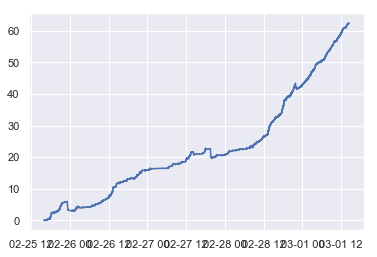

In [235]:
# Plot the volumetric cumulative sum against the time
plt.plot(FWT1.calTime, FWT1.incrVsum)

In [236]:
FWT1.dtypes

TimeString            object
VarValue               int64
levelDiff            float64
calTime       datetime64[ns]
incrSum              float64
incrVsum             float64
lminFlow             float64
dtype: object

In [237]:
# Counts the numbers of status values for the pump. -5 == Fault status
FWSflow1.VarValue.value_counts() 

-5     143131
 20     23988
 0        739
Name: VarValue, dtype: int64

In [238]:
# Converts time string values into datetime value
FWSflow1['calTime'] = pd.to_datetime(FWSflow1.TimeString, format = '%d.%m.%Y %H:%M:%S')

In [239]:
FWSflow1.dtypes

TimeString            object
VarValue               int64
calTime       datetime64[ns]
dtype: object

In [240]:
# Removes fault-status (-5)
FWSflow1.VarValue.where(FWSflow1.VarValue > 0, 0, inplace=True)

In [241]:
FWSflow1.VarValue.value_counts()

0     143870
20     23988
Name: VarValue, dtype: int64

In [242]:
# Code for if VarValue == 20 => flowrate = 0.1666 lmin

In [243]:
FWSflow1.head()

,TimeString,VarValue,calTime
VarName,,,
HARSLEV_PUMP_1_1PM_1_STATUS,25.02.2018 16:07:25,20,2018-02-25 16:07:25
HARSLEV_PUMP_1_1PM_1_STATUS,25.02.2018 16:07:27,20,2018-02-25 16:07:27
HARSLEV_PUMP_1_1PM_1_STATUS,25.02.2018 16:07:29,20,2018-02-25 16:07:29
HARSLEV_PUMP_1_1PM_1_STATUS,25.02.2018 16:07:31,20,2018-02-25 16:07:31
HARSLEV_PUMP_1_1PM_1_STATUS,25.02.2018 16:07:33,20,2018-02-25 16:07:33


In [244]:
FWT2.head()

,TimeString,VarValue
VarName,,
FOODWASTE_TANK_B_LEVEL_TREND,25.02.2018 16:07:23,14
FOODWASTE_TANK_B_LEVEL_TREND,25.02.2018 16:07:28,14
FOODWASTE_TANK_B_LEVEL_TREND,25.02.2018 16:07:33,15
FOODWASTE_TANK_B_LEVEL_TREND,25.02.2018 16:07:38,14
FOODWASTE_TANK_B_LEVEL_TREND,25.02.2018 16:07:43,15


In [245]:
FWT2.any(0)

TimeString    True
VarValue      True
dtype: bool

In [246]:
FWSflow2.head()

,TimeString,VarValue
VarName,,
HARSLEV_PUMP_1_2PM_1_STATUS,25.02.2018 16:07:25,20
HARSLEV_PUMP_1_2PM_1_STATUS,25.02.2018 16:07:27,20
HARSLEV_PUMP_1_2PM_1_STATUS,25.02.2018 16:07:29,20
HARSLEV_PUMP_1_2PM_1_STATUS,25.02.2018 16:07:31,20
HARSLEV_PUMP_1_2PM_1_STATUS,25.02.2018 16:07:33,20


In [247]:
x = FWT1.loc[:, 'TimeString']

In [ ]:
FWSflow1.plot()

In [ ]:
FWSflow2.plot()

## Division of the Food Waste flows 

The produced food waste is separated with a mesh in the tank into:

1. Solid food waste (FW)

2. Food waste water (FWW)

### Food Waste solids (FW)

FW is pumped with the Haarslew pump to the screen and further to the drier. As mentioned above, the variable value of 20 tells that the pump is producing with its capacity. The FW flow can be calculated directly from the data as: 

(flow capacity the pump (e.g. 2 kg / s)) / ( moment of first instance of VarValue 20 and moment of last instance of the VarValue 20)

### Food Waste water (FWW)

This data describes the flow of load in liquid form out of the waste system.

tank water pump 

- 20 Forward
- 15 Backward
- 0 Stop
- -5 Fault or overcurrent

No Hz info presumably 60 Hz

The FWW flow can be calculated directly from the data as: 

(flow capacity the pump (e.g. 20 kg / s)) / ( moment of first instance of VarValue 20 and moment of last instance of the VarValue 20)

The carbon can be considered as direct CO2- and nutrient emmision to the environment. All the carbon in the FW water are converted into CO2.


In [ ]:
FWW_flow = pd.read_csv('MunVene2/BORGEN_PUMP0.csv', delimiter=';')

In [ ]:
FWW_flow.head(2000)

In [ ]:
FWW_flow.tail()

## Values for the Biosludge tank:

- Biosludge mixing status: 0 = stop, 20 FWD, -5 Fail) 
- Biosludge tank level: as % filling of the full capacity e.g. 19 %

In [ ]:
BWTankLevel = pd.read_csv('MunVene2/LEVEL_BIOSLUDGETANK0.csv', delimiter=';')

In [ ]:
BWTankLevel.head()

In [ ]:
BWTankLevel.tail()

## Values for the Burners:

- All temperatures in the main and sec chambers as Celsius degrees

In [ ]:
Burner1 = pd.read_csv('MunVene2/BURNER_10.csv', delimiter=';')

In [ ]:
Burner1.head()

In [ ]:
Burner2 = pd.read_csv('MunVene2/BURNER_20.csv', delimiter=';')

In [ ]:
Burner2.head()

In [ ]:
Burner2.shape

In [ ]:
Dryer0 = pd.read_csv('MunVene2/DRYER0.csv', delimiter=';')

## Values for the Dryer:

- Dryer mixer motor current as %, e.g. 50 %
- Dryer temperature as Celcius degrees
- Dryer pressure as mbar
- Dryer filling weight as kgs

In [ ]:
Dryer0.shape

In [ ]:
Dryer0.head(20)

In [ ]:
FluegasTemp0 = pd.read_csv('MunVene2/FLUEGAS0.csv', delimiter=';')

## Values for the Flue gas:

- Flue gas temperature as Celcius degrees.
- Flue gas fan speed as Hz (or 1/10 Hz). Check!
- Flue gas opacity as 0 to 100 %


In [ ]:
FluegasTemp0.shape

In [ ]:
FluegasTemp0.head()

In [ ]:
FluegasFlow0 = pd.read_csv('MunVene2/ID_FAN0.csv', delimiter=';')

In [ ]:
FluegasFlow0.head()